 FDA_ PROJ: AIR POLLTION ANALYSIS

importing the packages

In [ ]:
install.packages("ggplot2")
install.packages("readxl")
install.packages("dplyr")
install.packages("readxl")
library(readxl)
library(ggplot2)
library(dplyr)
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



import the dataset and display

In [ ]:


# Read the Excel file using the read_excel function
aqi <- read_excel("/content/PROJ_AQI.xlsx")

# Convert the data to a data frame and display it
df <- as.data.frame(aqi)
print(df)


         CITY AQIval                        AQIcatg COval COcatg O3val   O3catg
1        Agra     50                           Good     1   Good    33     Good
2        Agra     55                       Moderate     1   Good    33     Good
3        Agra     68                       Moderate     1   Good    34     Good
4        Agra     58                       Moderate     1   Good    31     Good
5        Agra     58                       Moderate     1   Good    31     Good
6        Agra     26                           Good     0   Good    26     Good
7        Agra     35                           Good     1   Good    29     Good
8        Agra     41                           Good     1   Good    30     Good
9        Agra     67                       Moderate     1   Good    25     Good
10       Agra     29                           Good     1   Good    25     Good
11       Agra     44                           Good     1   Good    30     Good
12       Agra     62                    

Analyze the dataset column values  based on "CITIES" column

CITY,Avg_CO,Avg_NO2,Avg_O3,Avg_PM2.5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Agra,0.9047619,1.5238095,32.380952,47.80952
Ahmedabad,0.0000000,2.0952381,24.142857,25.04762
Ajmer,8.3043478,14.1304348,6.826087,128.08696
Bengaluru,2.5714286,0.5238095,16.619048,73.28571
Chennai,0.6216216,1.0000000,24.729730,39.18919
Cochin,1.0000000,2.6666667,26.380952,48.42857
Delhi,2.0909091,2.2727273,45.545455,97.00000
Hyderabad,0.8500000,0.1000000,33.950000,50.65000
Indore,1.0000000,0.0000000,38.904762,59.71429


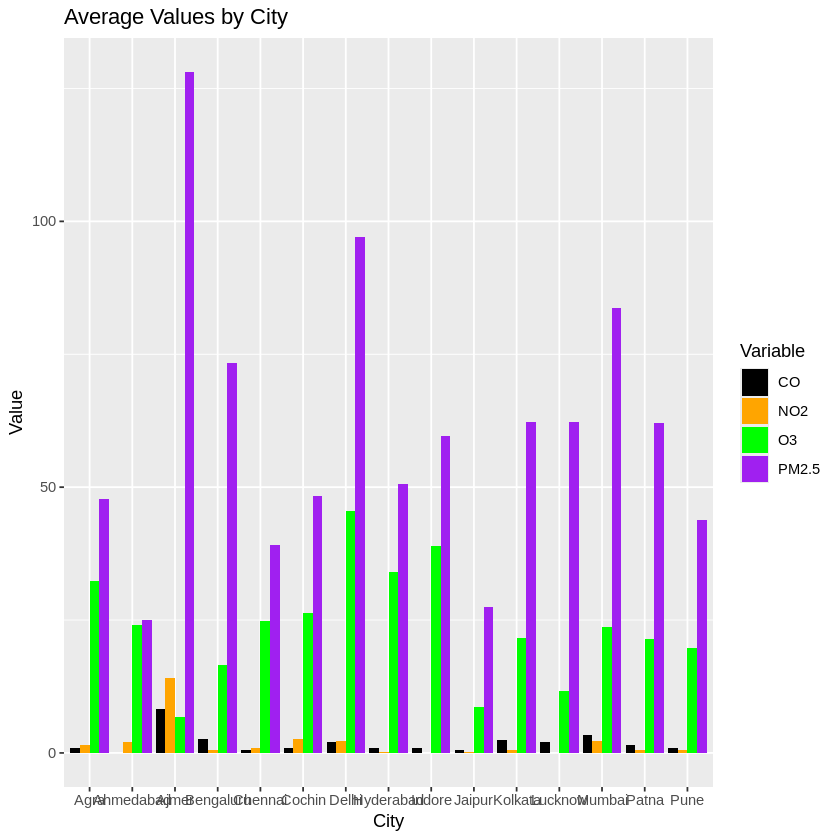

In [ ]:
city_summary= aqi %>%
  group_by(CITY) %>%
  summarise(Avg_CO = mean(COval),
            Avg_NO2 = mean(NO2val),
            Avg_O3 = mean(O3val),
            Avg_PM2.5 = mean(PM2.5val))
city_summary

# Reshape the data for plotting
city_summary = city_summary %>%
  tidyr::gather(key = "Variable", value = "Value", -CITY)

# Visualize the data
ggplot(data = city_summary, aes(x = CITY, y = Value, fill = Variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "City", y = "Value", fill = "Variable") +
  ggtitle("Average Values by City") +
  scale_fill_manual(values = c("black", "orange", "green", "purple"),
                    labels = c("CO", "NO2", "O3", "PM2.5"))

Displaying Avergae AQI values for all the 15 cities

CITY,Avg_AQI
<chr>,<dbl>
Agra,50.14286
Ahmedabad,33.61905
Ajmer,128.21739
Bengaluru,73.28571
Chennai,40.89189
Cochin,49.33333
Delhi,98.90909
Hyderabad,51.80000
Indore,60.95238


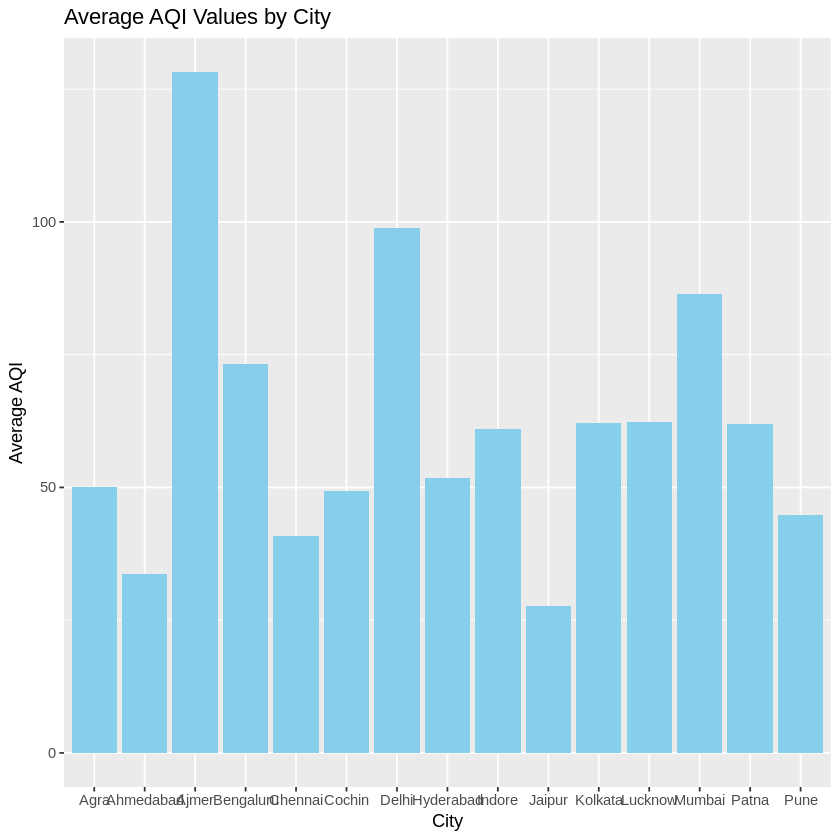

In [ ]:
city_summary2= aqi %>%
  group_by(CITY) %>%
  summarise(Avg_AQI = mean(AQIval))
city_summary2

# Visualize the data
ggplot(data = city_summary2, aes(x = CITY, y = Avg_AQI)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "City", y = "Average AQI") +
  ggtitle("Average AQI Values by City")

Displaying the Pie Chart of all he GAS CONCENRATION wrt city

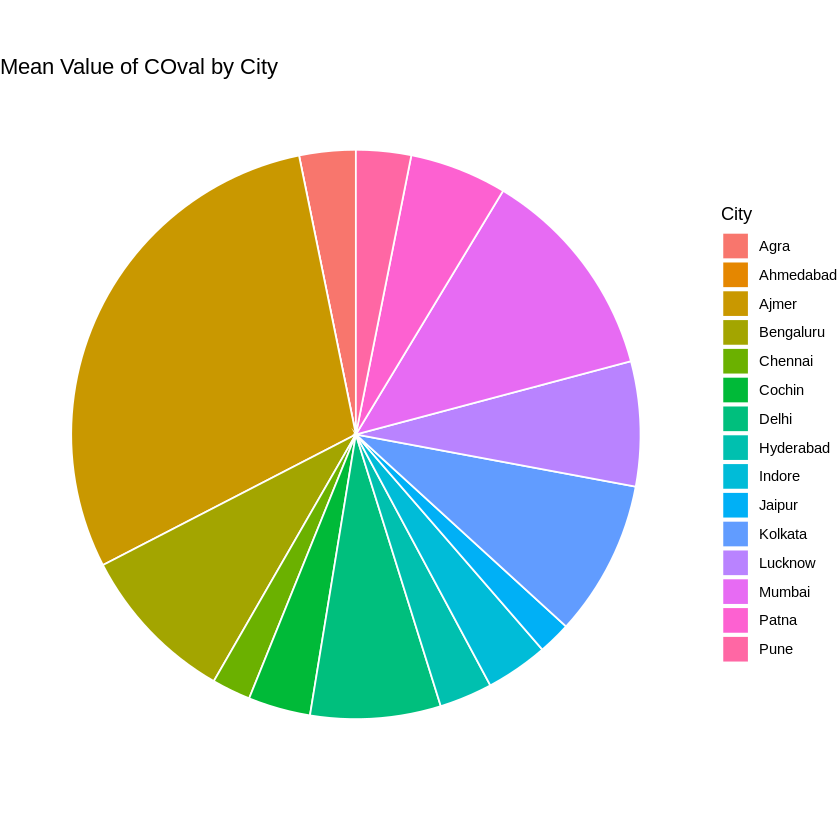

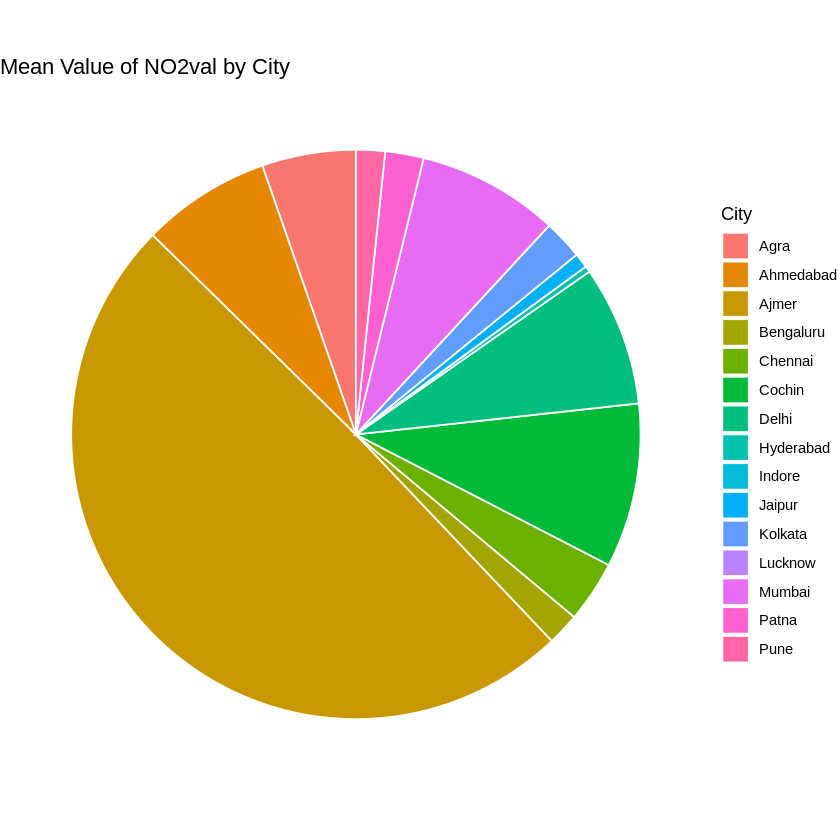

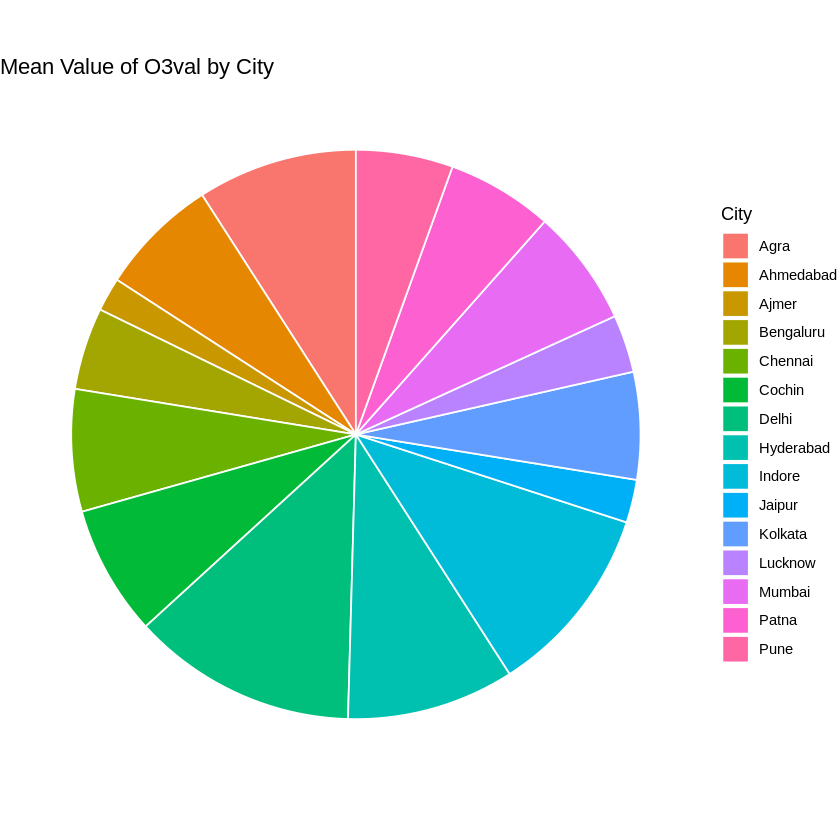

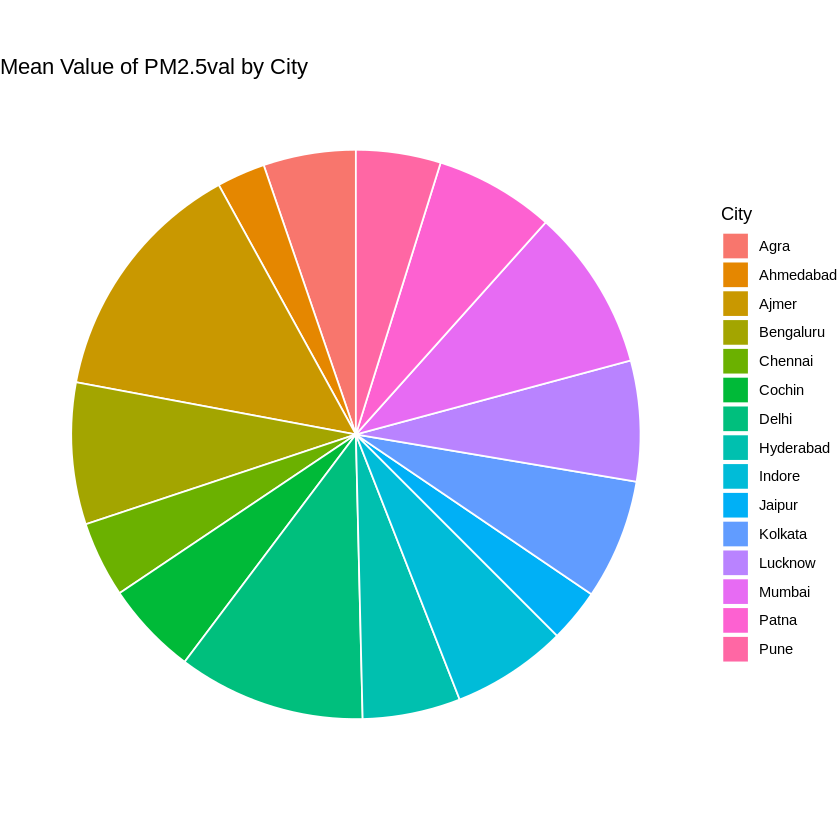

In [ ]:
column_names = c("COval", "NO2val", "O3val", "PM2.5val")

# Iterate through the column names and create pie charts
for (column_name in column_names) {
  # Calculate mean values by city for the specified column
  city_means = aqi %>%
    group_by(CITY) %>%
    summarise(MeanValue = mean(get(column_name)))
  city_means

  # Plot the pie chart
  pie_chart = ggplot(data = city_means, aes(x = "", y = MeanValue, fill = CITY)) +
    geom_bar(stat = "identity", width = 1, color = "white") +
    coord_polar("y", start = 0) +
    labs(x = NULL, y = NULL, fill = "City") +
    ggtitle(paste("Mean Value of", column_name, "by City")) +
    theme_void() +
    theme(legend.position = "right")

  # Display the pie chart
  print(pie_chart)
}

Finding out the predicted values and compare them with the actual values


Call:
lm(formula = AQIval ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1427 -2.4121 -1.3158  0.4603 18.5680 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.69954    0.80353   3.360 0.000929 ***
COval        0.96511    0.25817   3.738 0.000240 ***
O3val        0.10942    0.02726   4.014 8.34e-05 ***
NO2val       0.09038    0.12338   0.733 0.464663    
PM2.5val     0.90385    0.01283  70.436  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.317 on 207 degrees of freedom
Multiple R-squared:  0.9909,	Adjusted R-squared:  0.9908 
F-statistic:  5657 on 4 and 207 DF,  p-value: < 2.2e-16


        1         2         3         4         5         6         7         8 
 35.62779  30.86122  28.61581  42.98776  42.98776  85.09082  90.91288  95.10983 
        9        10        11        12        13        14        15        16 
 68.19058  57.12549  57.12549  46.52655  66.04269  41.86940  69.39704  65.39209 
       17        18        19        20        21        22        23        24 
 63.11823  44.23297  42.77326  59.42780  77.78497  61.54407  59.62693  64.44602 
       25        26        27        28        29        30        31        32 
 73.37513  56.68779  38.12485  56.82566  73.04686  66.78114  31.03190  67.87104 
       33        34        35        36        37        38        39        40 
 83.34597  77.01900  76.97083  76.97083  28.89592  52.64341  90.24324  47.04957 
       41        42        43        44        45        46        47        48 
 43.90470 197.14021 149.08844  30.58546  53.75738 287.15281  31.27047  52.85352 
       49        50        5

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


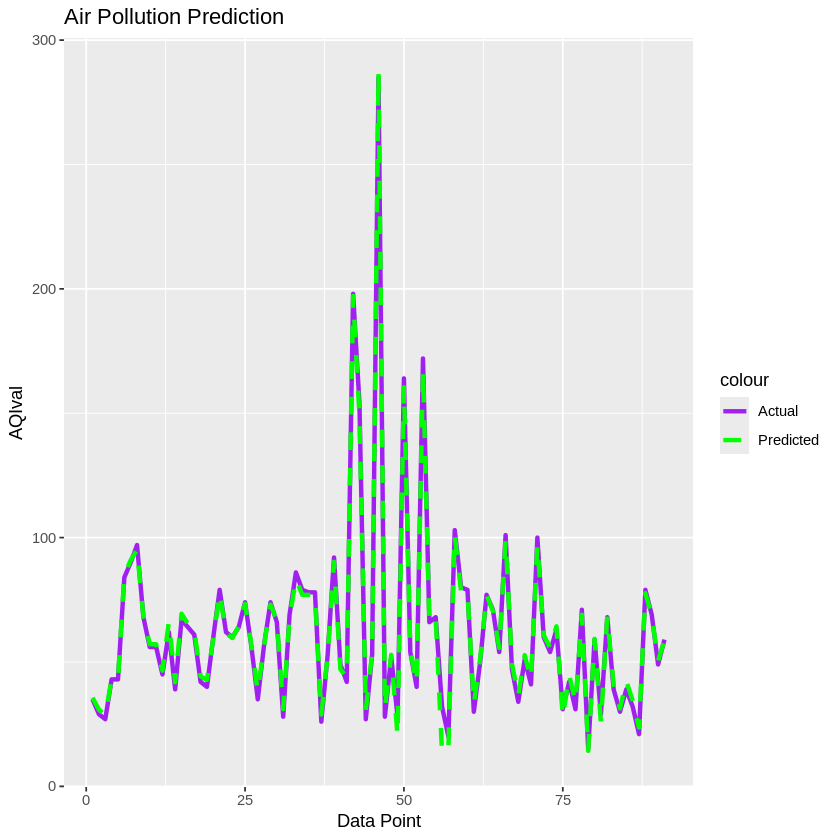

In [ ]:
# Convert decimal index to an integer using as.integer() for proper subsetting
train_data <- data[1:as.integer(0.7 * nrow(data)), ]
test_data <- data[(as.integer(0.7 * nrow(data)) + 1):nrow(data), ]

# Fit a linear regression model
model <- lm(AQIval ~ ., data = train_data)
summary(model)

# Predict future values
predicted_values <- predict(model, newdata = test_data)

# Print the predicted values
print(predicted_values)

# Plot the actual and predicted values using ggplot2
library(ggplot2)
test_data$Predicted_AQI <- predicted_values
ggplot() +
  geom_line(data = test_data, aes(x = 1:nrow(test_data), y = AQIval, color = "Actual"), linetype = "solid", size = 1.25) +
  geom_line(data = test_data, aes(x = 1:nrow(test_data), y = Predicted_AQI, color = "Predicted"), linetype = "dashed", size = 1.25) +
  labs(title = "Air Pollution Prediction", x = "Data Point", y = "AQIval") +
  scale_color_manual(values = c("Actual" = "purple", "Predicted" = "green"))


To find which city has maximum impact for each gases baseed on the concenration values

Gas: COval 
City with the maximum impact due to Gas: CITYDelhi 



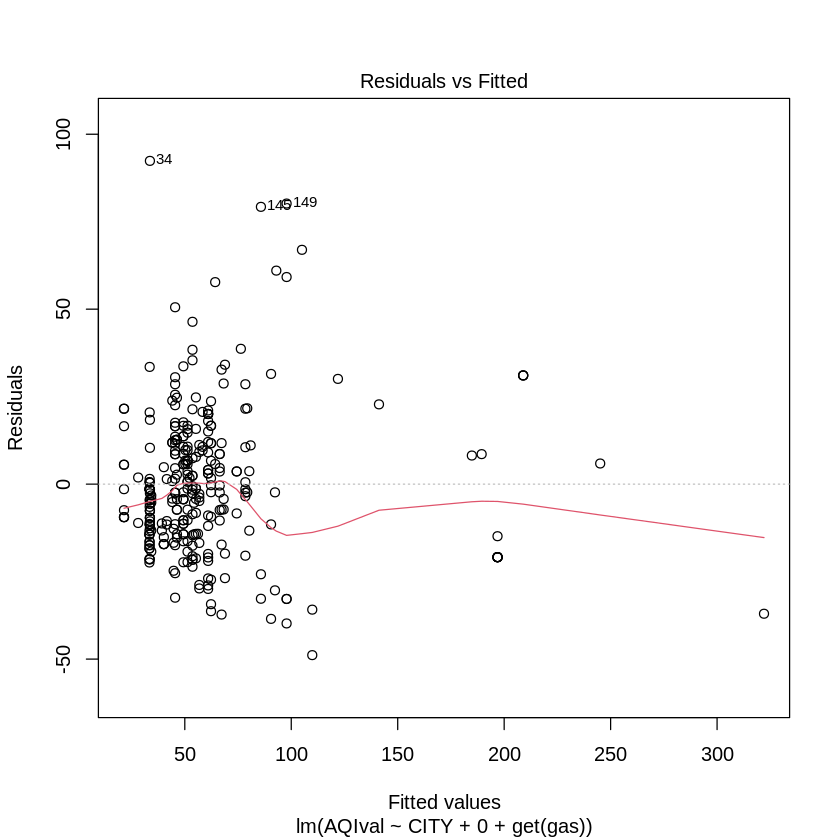

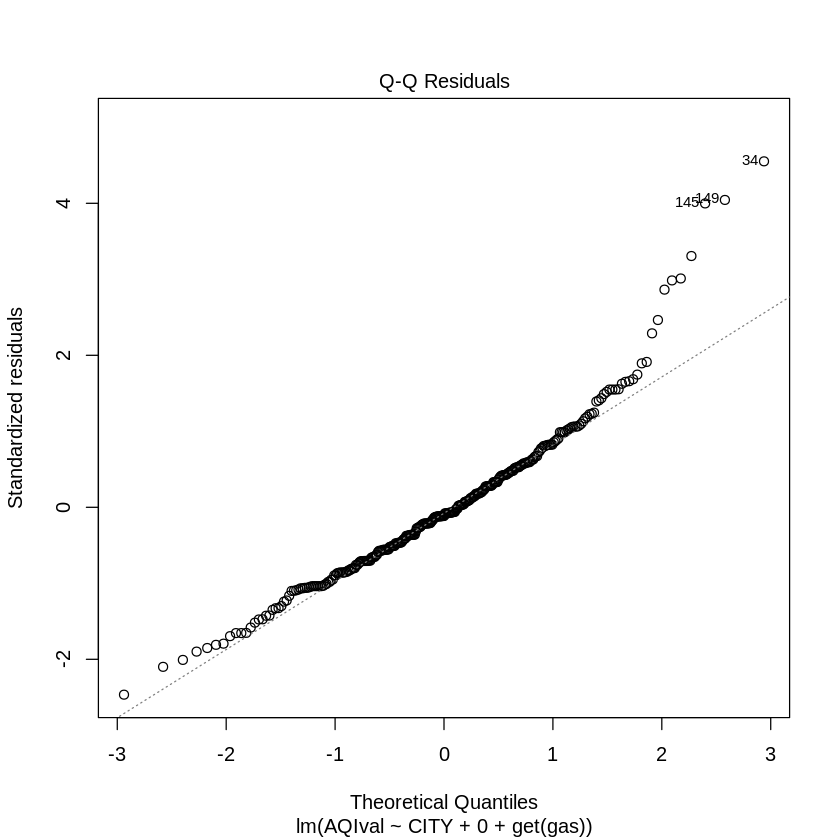

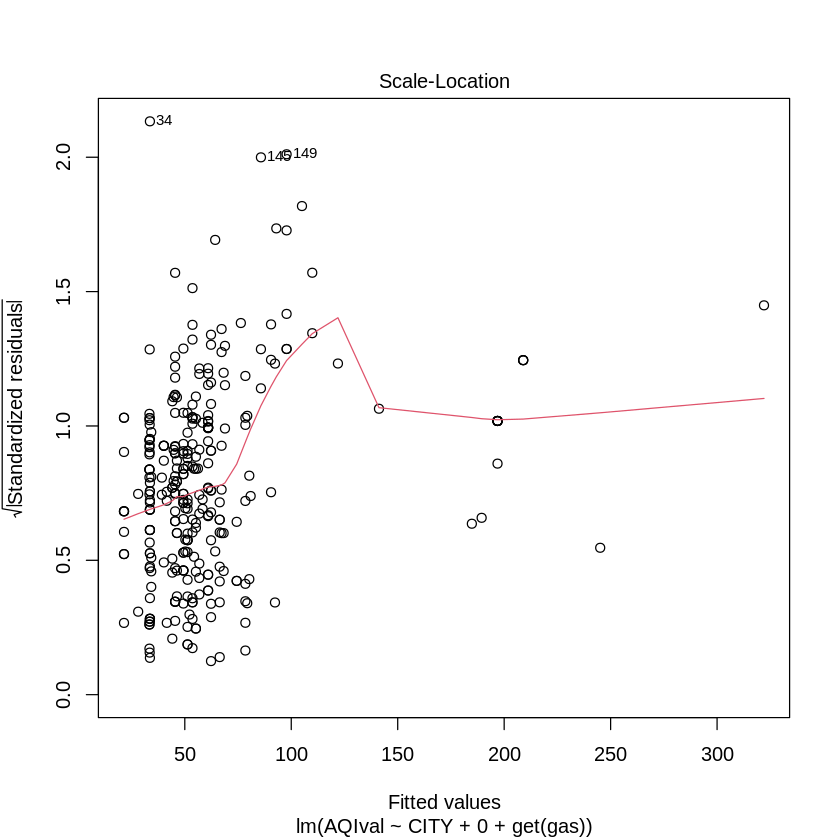

Gas: NO2val 
City with the maximum impact due to Gas: CITYDelhi 



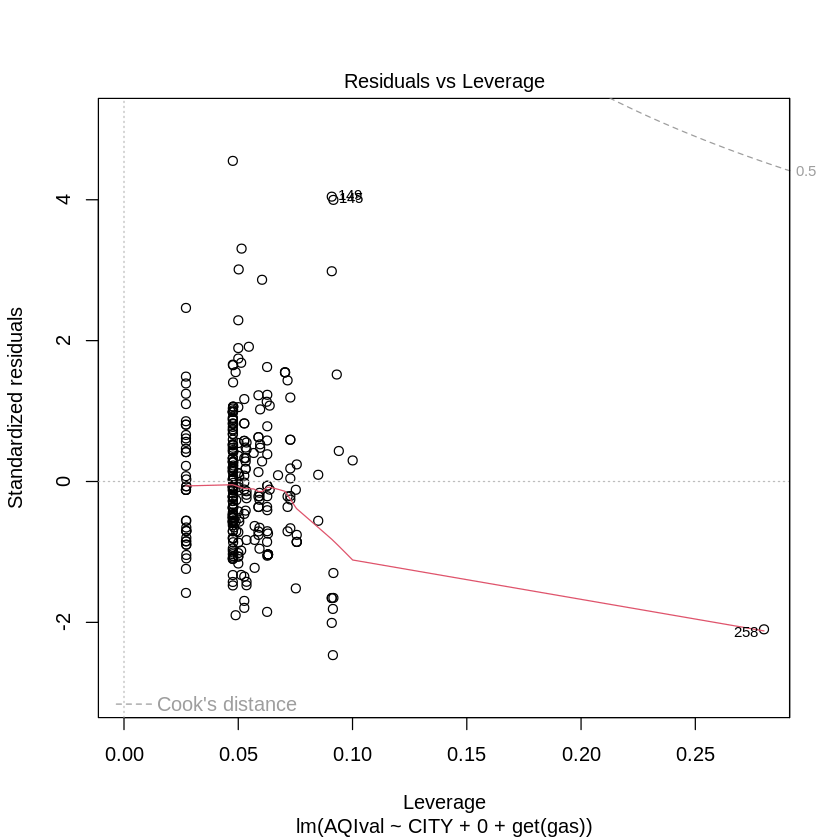

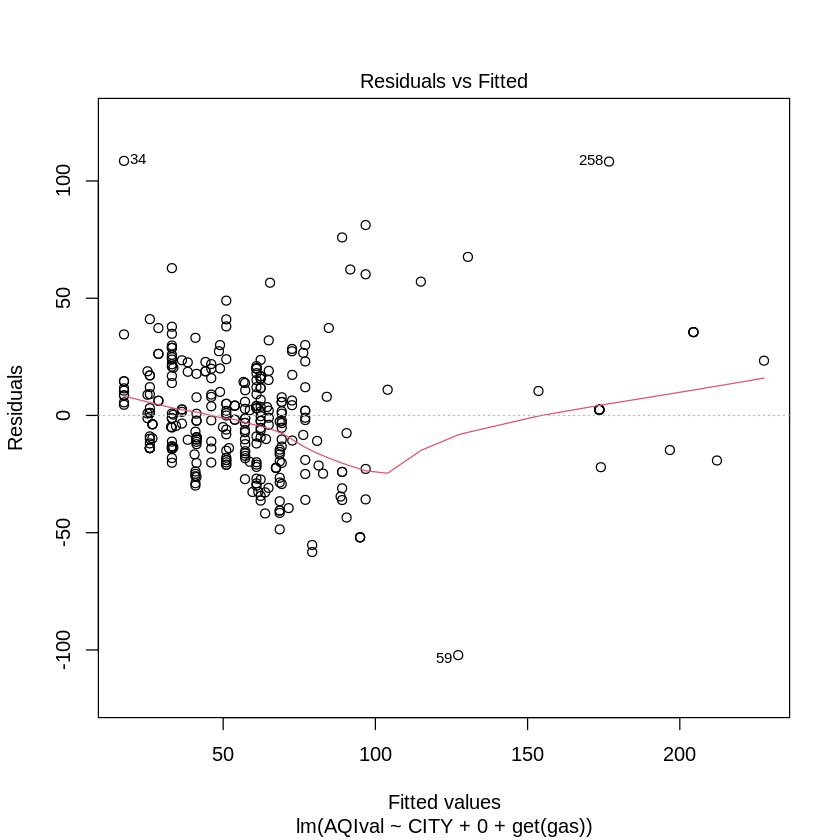

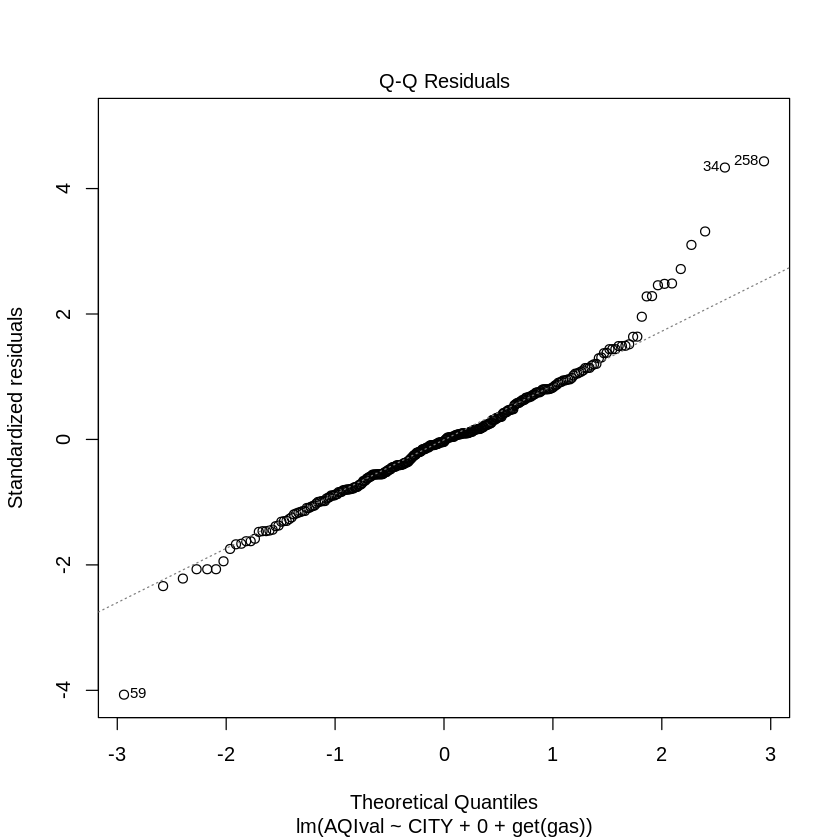

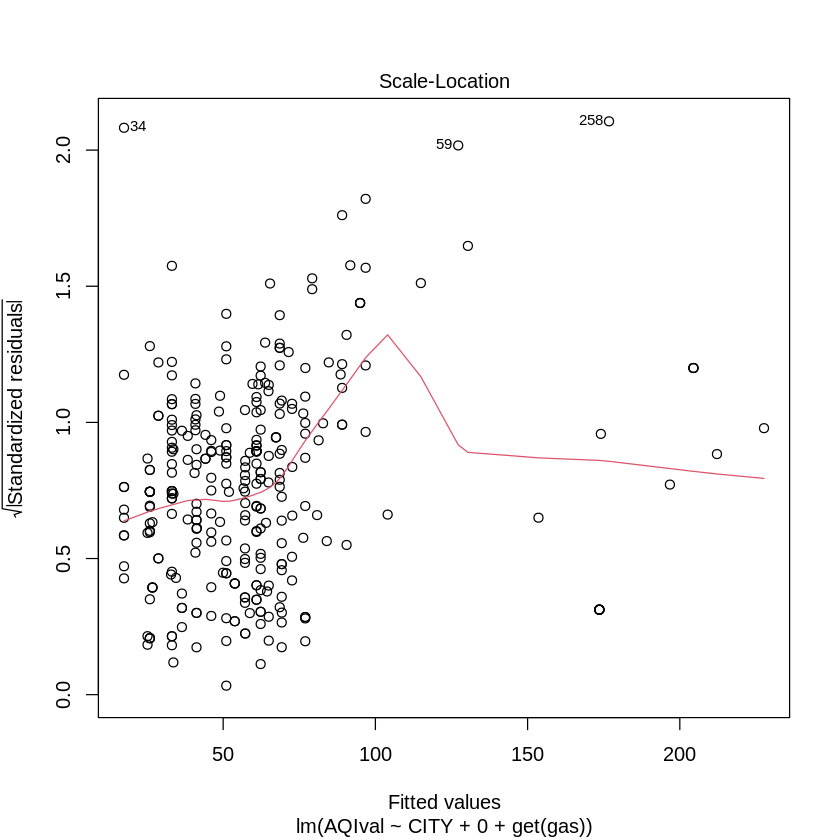

Gas: O3val 
City with the maximum impact due to Gas: CITYAjmer 



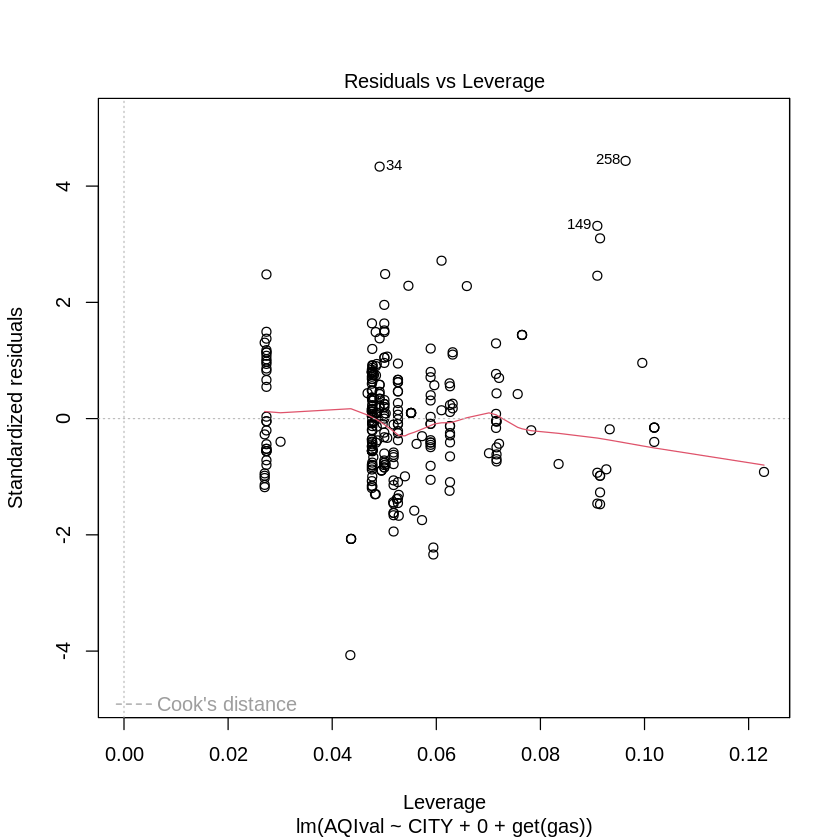

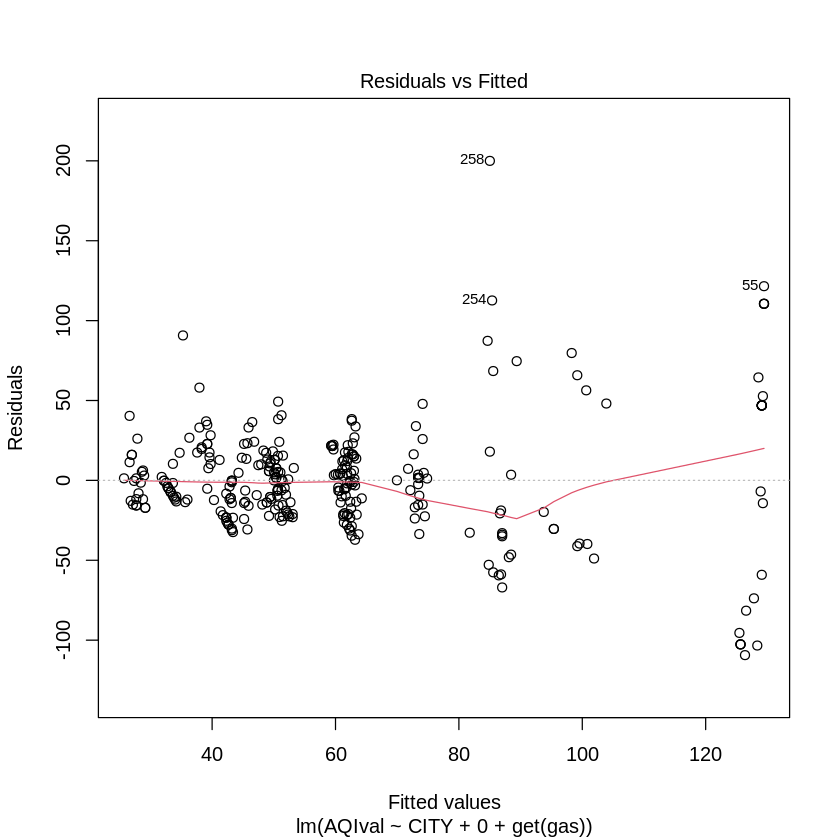

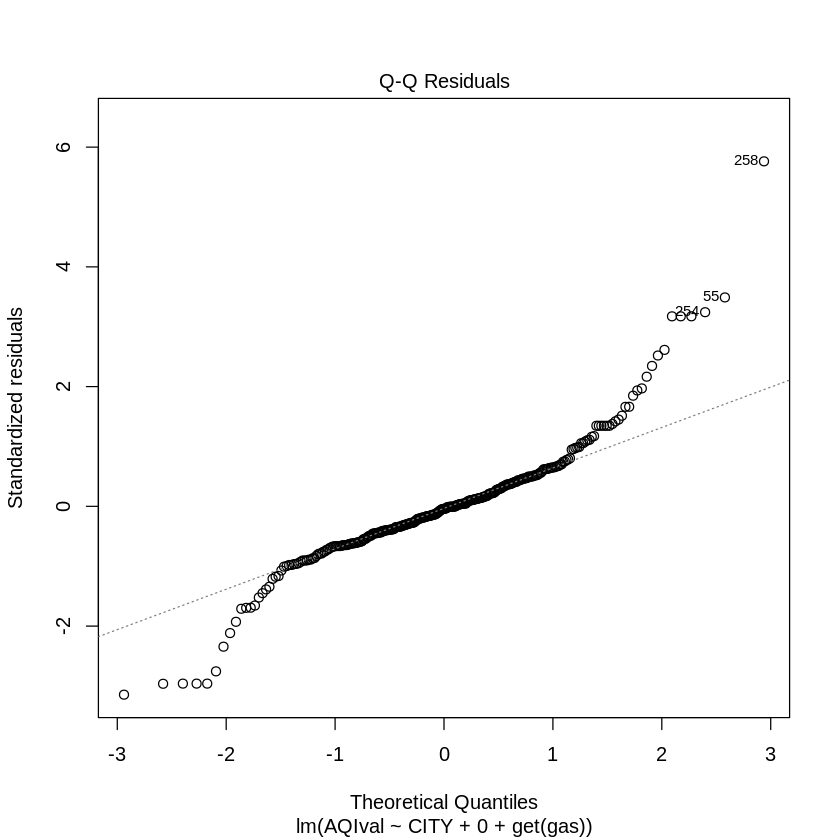

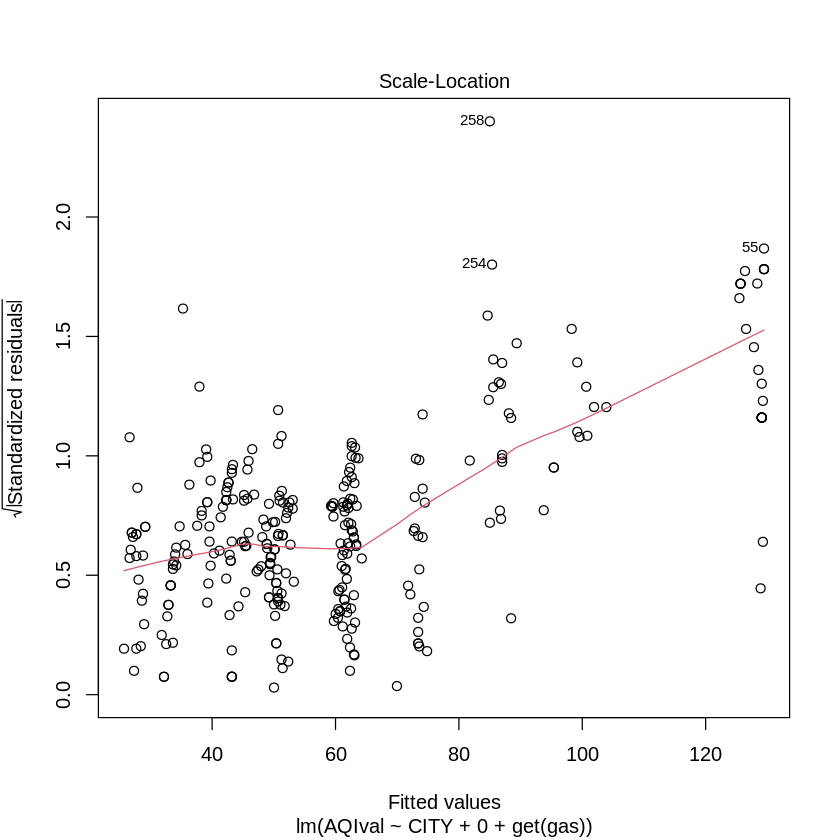

Gas: PM2.5val 
City with the maximum impact due to Gas: CITYAhmedabad 



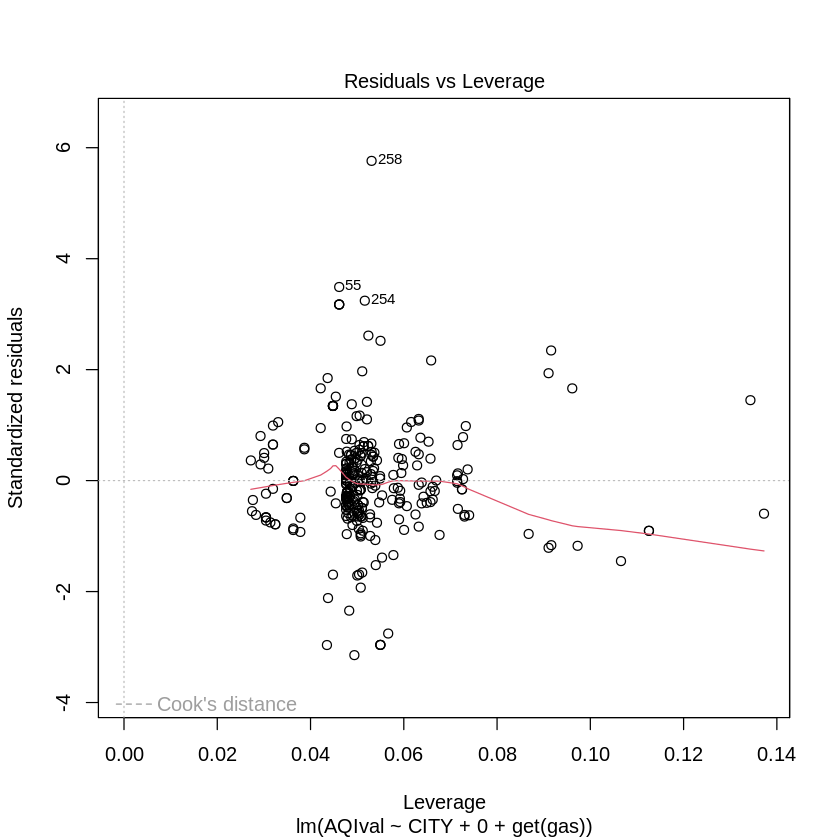

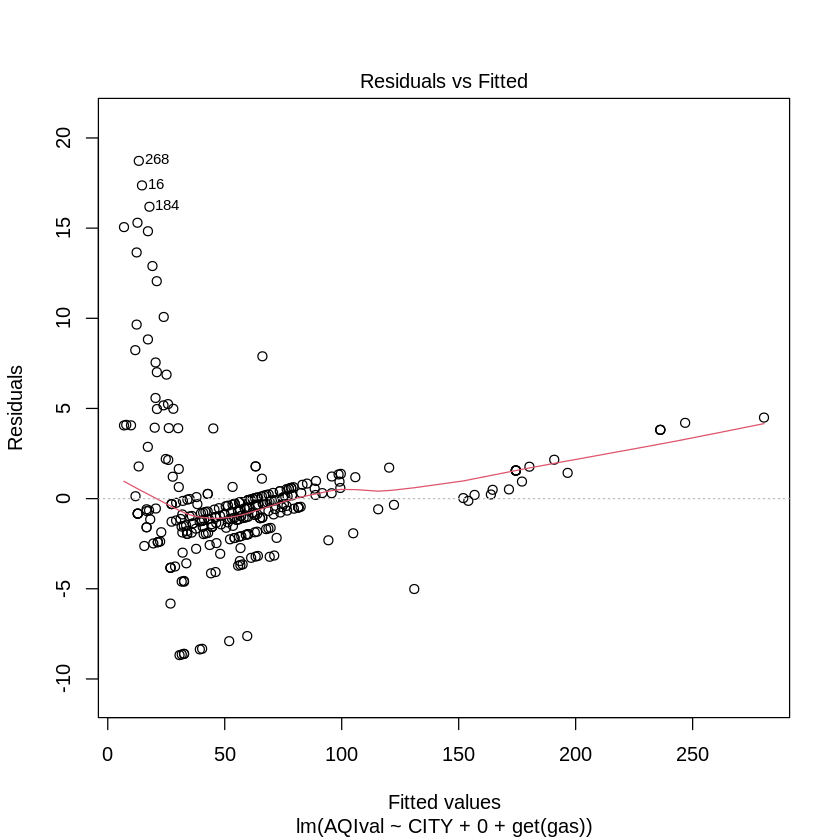

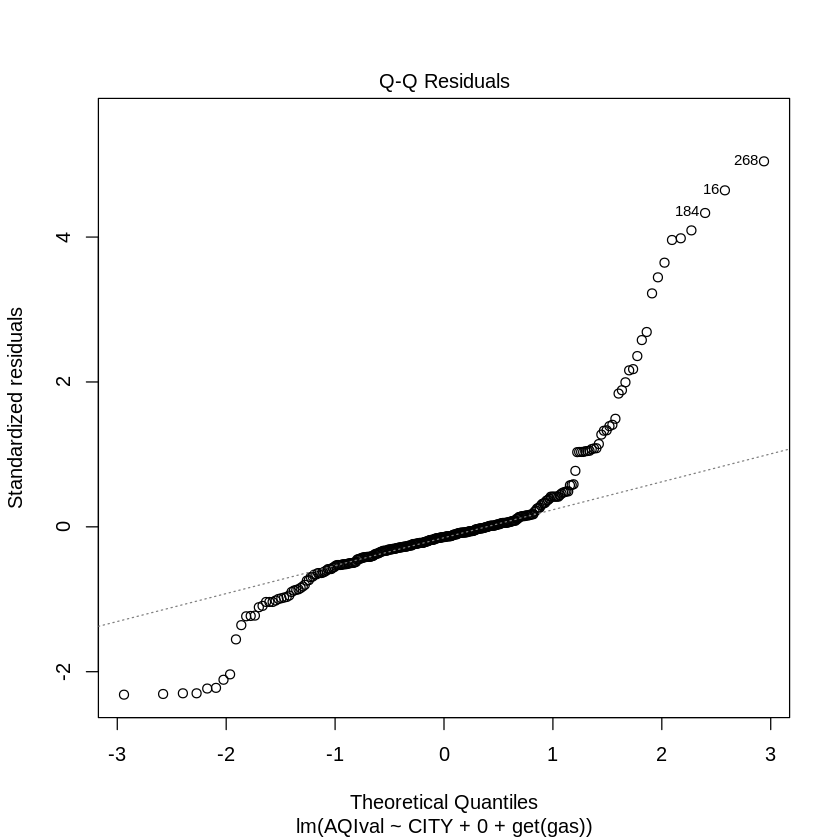

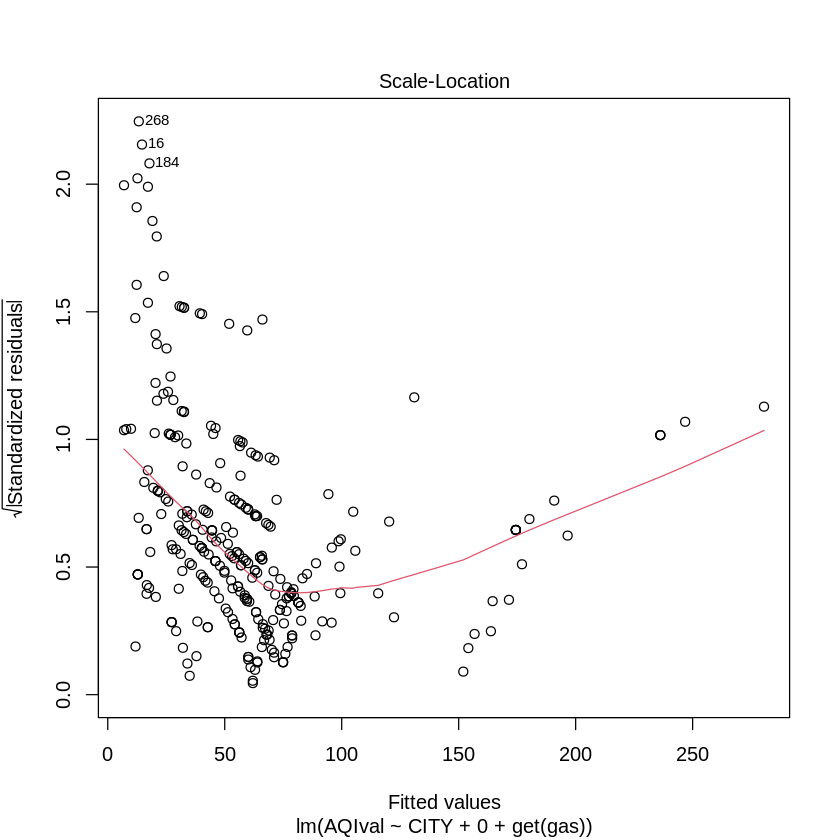

Maximum impact cities for each gas:
[1] "CITYDelhi"     "CITYDelhi"     "CITYAjmer"     "CITYAhmedabad"


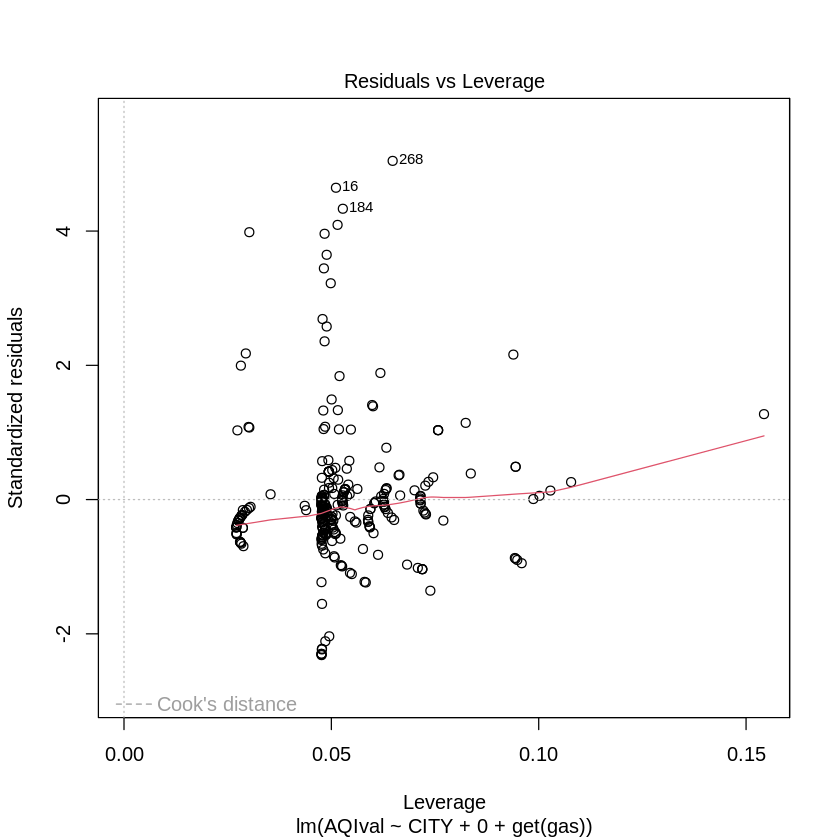

In [ ]:
# Read the dataset

# Create a vector of gas names
gases <- c("COval", "NO2val", "O3val", "PM2.5val")

# Create an empty vector to store the maximum impact cities
max_impact_cities <- vector("character", length(gases))

# Perform multiple linear regression for each gas
for (i in 1:length(gases)) {
  gas <- gases[i]
  reg_model <- lm(AQIval ~ CITY + 0 + get(gas), data = aqi)  # Exclude intercept with "+ 0"

  # Extract coefficient values
  coefficients <- coef(reg_model)
  coefficients <- coefficients[1:length(coefficients) != 1]  # Remove intercept

  # Find the city with the maximum impact for the current gas
  max_impact_city <- names(coefficients)[which.max(coefficients)]

  # Store the maximum impact city in the vector
  max_impact_cities[i] <- max_impact_city

  # Print the result for the current gas
  cat("Gas:", gas, "\n")
  cat("City with the maximum impact due to Gas:", max_impact_city, "\n\n")

  # Plot the regression model for the current gas
  plot(reg_model)
}

# Print the vector of maximum impact cities for all gases
cat("Maximum impact cities for each gas:\n")
print(max_impact_cities)
